In [1]:
%matplotlib inline

from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from ripser import ripser
from persim import plot_diagrams

from atlas_pam import *

/home/ryan/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<h2>Load all data</h2>

In [2]:
counts_M = pd.read_csv("peyers_data/counts_M.csv", index_col=0)
normCounts_M = pd.read_csv("peyers_data/normCounts_M.csv", index_col=0)
md_M = pd.read_csv("peyers_data/md_M.txt", index_col=0,
                  sep="\t")

counts_tissue = pd.read_csv("peyers_data/counts_tissue.csv", index_col=0)
normCounts_tissue = pd.read_csv("peyers_data/normCounts_tissue.csv",
                                index_col=0)
md_tissue = pd.read_csv("peyers_data/md_tissue.txt", index_col=0,
                       sep="\t")

<h2>Do preprocessing for counts_M</h2>

In [3]:
counts_M.head()

,wt_Duodenum_Jax_1B,wt_Ileum_Jax_1B,wt_Jejunum_Jax_1B,wt_Duodenum_Jax_1C,wt_Ileum_Jax_1C,wt_Jejunum_Jax_1C,wt_Duodenum_Jax_1D,wt_Ileum_Jax_1D,wt_Jejunum_Jax_1D,wt_Duodenum_Jax_1E,...,villin-cre_Jejunum_Jax_SFB_6E,villin-cre_Duodenum_Jax_SFB_7C,villin-cre_Ileum_Jax_SFB_7C,villin-cre_Jejunum_Jax_SFB_7C,villin-cre_Duodenum_Jax_SFB_8B,villin-cre_Ileum_Jax_SFB_8B,villin-cre_Jejunum_Jax_SFB_8B,villin-cre_Duodenum_Jax_SFB_8C,villin-cre_Ileum_Jax_SFB_8C,villin-cre_Jejunum_Jax_SFB_8C
Gnai3,3596,4805,1807,3294,4323,3257,2756,4023,3038,2196,...,4065,1673,4462,2825,701,3395,2746,1778,5390,6334
Cdc45,2,335,109,103,78,35,0,1,544,10,...,1,0,0,1,2,2,0,1,2,1
Apoh,184,372,147,148,141,124,190,4,210,139,...,111,670,102,1,152,11,12,183,22,28
Narf,480,354,114,392,278,889,724,1083,592,786,...,439,258,628,282,451,363,416,316,790,708
Cav2,530,225,358,799,217,1137,1334,212,71,901,...,0,127,0,0,1,0,0,86,0,0


In [4]:
d_M, n_M = counts_M.shape

print((n_M, d_M))

print("What is five percent of n?")
print(0.05 * n_M)

app_fp = np.floor(0.05 * n_M).astype(int)

(64, 15623)
What is five percent of n?
3.2


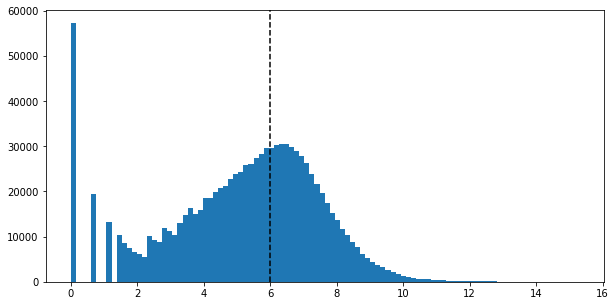

In [5]:
X_M = counts_M.to_numpy().T

logX_M = np.log(X_M + 1)
logvec = logX_M.reshape(n_M * d_M)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.hist(logvec, bins=100)

log_cap = 6
ax.axvline(log_cap, color="k", linestyle="dashed")

plt.show()

<h3>Below, get rid of genes without enough patients according to app_fp</h3>

Shape of X_M_trim:
(64, 10349)


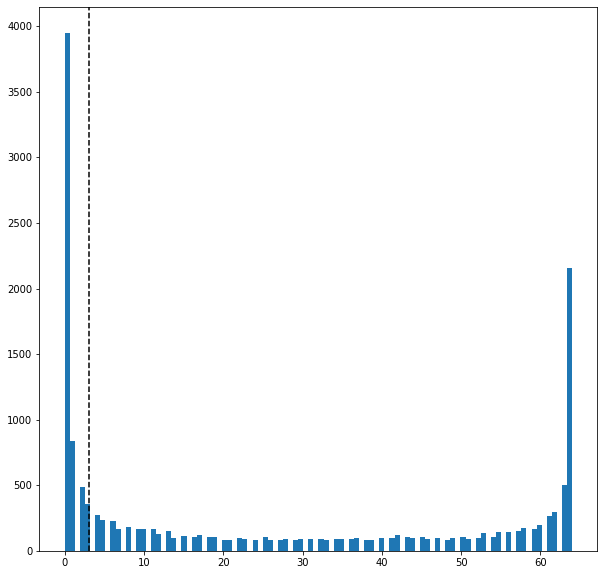

In [6]:
logical_mat = (logX_M >= log_cap).astype(int)
nontrivial_counts = np.sum(logical_mat, axis=0)
to_keep = (nontrivial_counts >= app_fp)

X_M_trim = X_M[:, to_keep]
print("Shape of X_M_trim:")
print(X_M_trim.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.hist(nontrivial_counts, bins=100)
ax.axvline(app_fp, color="k", linestyle="dashed")

plt.show()

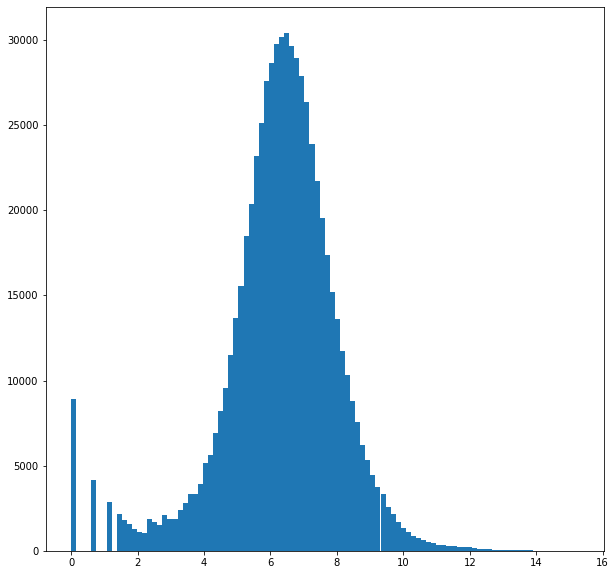

In [7]:
_, d_M_trim = X_M_trim.shape
logX_M_trim = np.log(X_M_trim + 1)
logX_M_trim_vec = logX_M_trim.reshape(n_M * d_M_trim)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.hist(logX_M_trim_vec, bins=100)

plt.show()

<h2>Do preprocessing for counts_tissue</h2>

In [8]:
counts_tissue.head()

,wt_Ileum_Jax_SFB_11,wt_Jejunum_Jax_SFB_11,villin-cre_Ileum_Jax_SFB_15,villin-cre_Jejunum_Jax_SFB_15,wt_Ileum_Jax_20,wt_Jejunum_Jax_20,villin-cre_Ileum_Jax_24,villin-cre_Jejunum_Jax_24,wt_Ileum_Jax_SFB_26,wt_Jejunum_Jax_SFB_26,...,villin-cre_Ileum_GF_55,villin-cre_Jejunum_GF_55,villin-cre_Duodenum_GF_56,villin-cre_Ileum_GF_56,villin-cre_Jejunum_GF_56,villin-cre_Duodenum_GF_57,villin-cre_Ileum_GF_57,villin-cre_Jejunum_GF_57,villin-cre_Ileum_Jax_8,villin-cre_Jejunum_Jax_8
Gnai3,3871,3116,4155,3758,3697,2980,4075,3332,3062,3472,...,3957,3460,2855,3169,4608,2811,5112,3684,5095,4322
Cdc45,550,318,434,468,233,163,165,145,605,404,...,158,177,75,110,119,83,194,137,204,155
Narf,1431,1199,1380,1336,953,1007,1160,742,976,1203,...,849,1426,834,859,862,841,1370,1112,1228,884
Cav2,108,76,77,68,101,48,112,69,53,82,...,89,100,47,64,57,104,116,117,128,104
Klf6,2661,2113,3214,3187,2151,2344,2878,2050,1520,2569,...,2556,2732,2083,2367,3055,3123,3798,3220,3875,2856


In [9]:
d_tissue, n_tissue = counts_tissue.shape

print((n_tissue, d_tissue))

print("What is five percent of n?")
print(0.05 * n_tissue)

app_fp = np.floor(0.05 * n_tissue).astype(int)

(78, 14542)
What is five percent of n?
3.9000000000000004


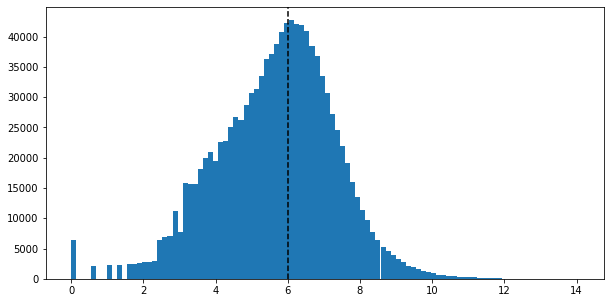

In [10]:
X_tissue = counts_tissue.to_numpy().T

logX_tissue = np.log(X_tissue + 1)
logvec = logX_tissue.reshape(n_tissue * d_tissue)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.hist(logvec, bins=100)

log_cap = 6
ax.axvline(log_cap, color="k", linestyle="dashed")

plt.show()

<h3>Below, get rid of genes without enough patients according to app_fp</h3>

Shape of X_tissue_trim:
(78, 8927)


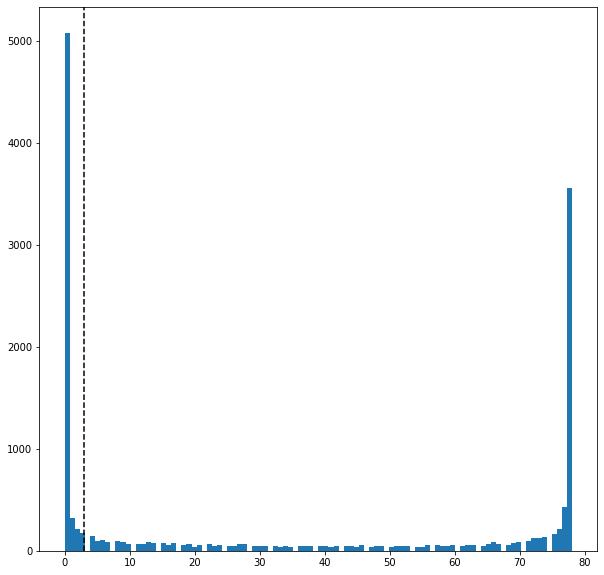

In [11]:
logical_mat = (logX_tissue >= log_cap).astype(int)
nontrivial_counts = np.sum(logical_mat, axis=0)
to_keep = (nontrivial_counts >= app_fp)

X_tissue_trim = X_tissue[:, to_keep]
print("Shape of X_tissue_trim:")
print(X_tissue_trim.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.hist(nontrivial_counts, bins=100)
ax.axvline(app_fp, color="k", linestyle="dashed")

plt.show()

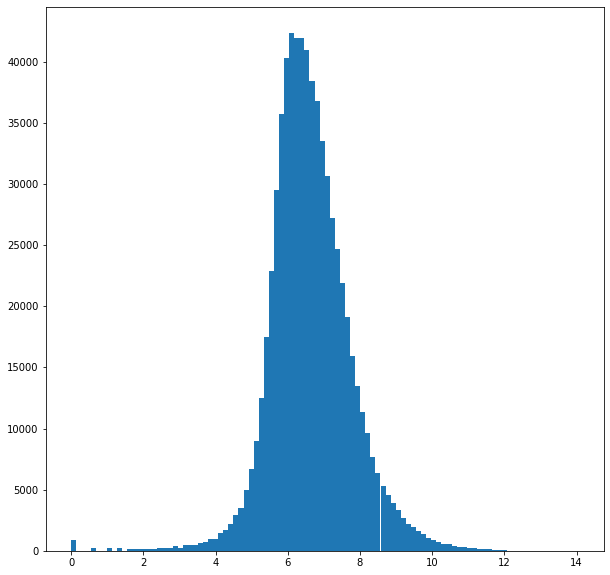

In [12]:
_, d_tissue_trim = X_tissue_trim.shape
logX_tissue_trim = np.log(X_tissue_trim + 1)
logX_tissue_trim_vec = logX_tissue_trim.reshape(n_tissue * d_tissue_trim)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.hist(logX_tissue_trim_vec, bins=100)

plt.show()